In [2]:
import os
import pandas as pd
from scipy.stats import norm  
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [18]:
root = '/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/overAll/'
accuracy = pd.read_csv(root+"accuracy.csv")
overall = pd.read_csv(root+"Overall.csv")
overall = overall[~overall['opalTime'].isna()]
input_data = pd.read_csv(root+"inputStats.csv")

In [5]:
def mean_median_std(data, field):
    print("mean of %s: %f" %( field, data[field].mean()))
    print("std of %s: %f" %( field, data[field].std()))
    print("median of %s: %f" %( field, data[field].median()))
    print('\n')
    
def violin(data, field, path):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1)
    ax1.violinplot(data[field], showmedians=True)
    ax1.set_title(field)
    plt.savefig(path)
    plt.show()
    plt.close()
    
def cumulative_curve(data, field):
    plt.title(field)
    X2 = np.sort(data[field])/float(1000)
    F2 = np.array(range(len(data[field])))
    plt.plot(X2, F2)
    plt.ticklabel_format(useOffset=False)
    plt.show()
    plt.close()
    
def remove_outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    new_df = df[filtered_entries]
    return new_df

In [8]:
print("####### Accuracy Comparison ####### \n ")
mean_median_std(accuracy, 'precision')
mean_median_std(accuracy, 'recall')
mean_median_std(accuracy, 'OPAL')
mean_median_std(accuracy, 'Merge')
mean_median_std(accuracy, 'intersection')

df = pd.DataFrame(dict(mean=[accuracy['precision'].mean(), accuracy['recall'].mean()],
                  std=[accuracy['precision'].std(), accuracy['recall'].std()],
                  median=[accuracy['precision'].median(), accuracy['recall'].median()]))

print(df.to_latex(index = True, index_names= True))


overall_fair = overall[(overall['mergeEdges'] != -1) & (overall['opalEdges'] != -1)]

print("####### Edge Comparison ####### \n ")
mean_median_std(overall_fair, 'mergeEdges')
mean_median_std(overall_fair, 'opalEdges')

print("merge edges: %d" %(overall_fair['mergeEdges'].sum()))
print("opal edges: %d" %(overall_fair['mergeEdges'].sum()))

print("####### Time Comparison ####### \n ")
df = pd.DataFrame(dict(mean=[overall_fair['mergeTime'].mean(), overall_fair['opalTime'].mean(), overall_fair['cgPool'].mean()],
                  std=[overall_fair['mergeTime'].std(), overall_fair['opalTime'].std(), overall_fair['cgPool'].std()],
                  median=[overall_fair['mergeTime'].median(), overall_fair['opalTime'].median(), overall_fair['cgPool'].median()]))

print(df.to_latex(index = True, index_names= True))

mean_median_std(overall_fair, 'mergeTime')
mean_median_std(overall_fair, 'UCHTime')
mean_median_std(overall_fair, 'opalTime')

####### Accuracy Comparison ####### 
 
mean of precision: 0.986204
std of precision: 0.096140
median of precision: 1.000000


mean of recall: 0.660008
std of recall: 0.400864
median of recall: 0.909091


mean of OPAL: 20.690897
std of OPAL: 80.660564
median of OPAL: 2.000000


mean of Merge: 12.377574
std of Merge: 59.996623
median of Merge: 1.000000


mean of intersection: 12.015537
std of intersection: 58.936274
median of intersection: 1.000000


\begin{tabular}{lrrr}
\toprule
{} &      mean &       std &    median \\
\midrule
0 &  0.986204 &  0.096140 &  1.000000 \\
1 &  0.660008 &  0.400864 &  0.909091 \\
\bottomrule
\end{tabular}

####### Edge Comparison ####### 
 
mean of mergeEdges: 766118.600000
std of mergeEdges: 46090.244866
median of mergeEdges: 748612.000000


mean of opalEdges: 1304553.000000
std of opalEdges: 87078.914839
median of opalEdges: 1266028.000000


merge edges: 3830593
opal edges: 3830593
####### Time Comparison ####### 
 
\begin{tabular}{lrrr}
\toprule
{} &   

####### Accuracy Comparison ####### 
 


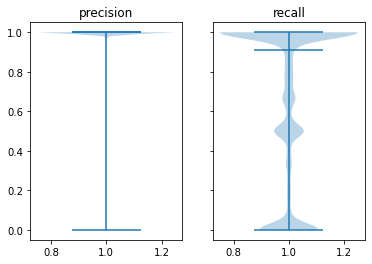

####### Edge Comparison ####### 
 


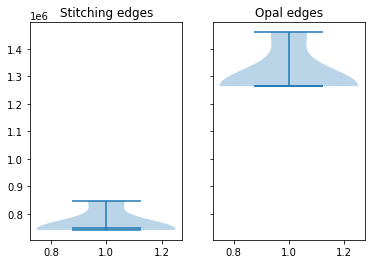

####### Time Comparison ####### 
 


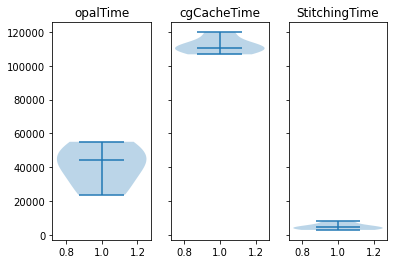

In [16]:
directory = "figure"
if not os.path.exists(directory):
    os.mkdir(directory)

print("####### Accuracy Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1[0].violinplot(accuracy['precision'], showmedians=True)
ax1[1].violinplot(accuracy['recall'], showmedians=True)
ax1[0].set_title('precision')
ax1[1].set_title('recall')
plt.savefig(directory+'/precisonRecall.pdf')
plt.show()
plt.close()


print("####### Edge Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1[0].violinplot(overall_fair['mergeEdges'], showmedians=True)
ax1[1].violinplot(overall_fair['opalEdges'], showmedians=True)
ax1[0].set_title('Stitching edges')
ax1[1].set_title('Opal edges')
plt.savefig(directory+'/edgeComparison.pdf')
plt.show()
plt.close()

print("####### Time Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=True)
ax1[0].violinplot(overall_fair['opalTime'], showmedians=True)
ax1[1].violinplot(overall_fair['cgPool'], showmedians=True)
ax1[2].violinplot(overall_fair['mergeTime'], showmedians=True)
ax1[0].set_title('opalTime')
ax1[1].set_title('cgCacheTime')
ax1[2].set_title('StitchingTime')
plt.savefig(directory+'/timeViolin.pdf')
plt.show()
plt.close()



####### Input Data ####### 
 


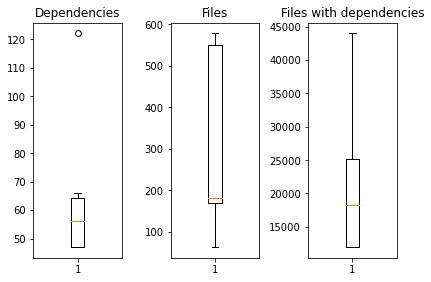

In [36]:
print("####### Input Data ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=False)
ax1[0].boxplot(remove_outliers(input_data['depNum']))
ax1[0].set_title('Dependencies')
ax1[1].boxplot(remove_outliers(input_data['numFiles']))
ax1[1].set_title('Files')
ax1[2].boxplot(remove_outliers(input_data['numFilesWithDeps']))
ax1[2].set_title('Files with dependencies')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

In [32]:
input_data['numFilesWithDeps']

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

In [41]:
new = input_data['numFilesWithDeps'][0:2]
cond = input_data['numFilesWithDeps'].isin(new)
df1 = input_data['numFilesWithDeps']
df2 = df1.drop(df1[cond].index)
print(df2)


4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64


In [39]:
new

0    24475
1    11956
Name: numFilesWithDeps, dtype: int64

In [18]:
print("depNum: %s"%input_data['depNum'].mean())
print("numFiles: %s"%input_data['numFiles'].mean())
print("numFilesWithDeps: %s"%input_data['numFilesWithDeps'].mean())

depNum: 61.5
numFiles: 316.3
numFilesWithDeps: 20625.2


In [40]:
df1

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

####### Accuracy Comparison ####### 
 


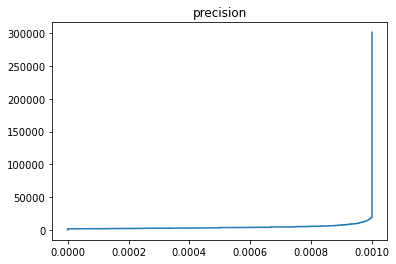

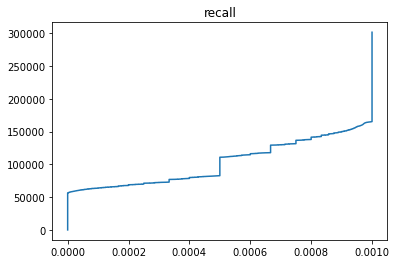

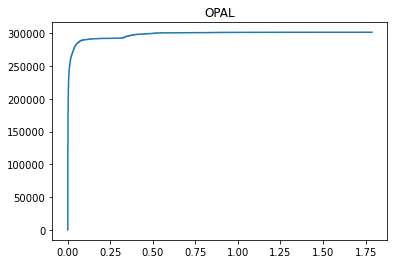

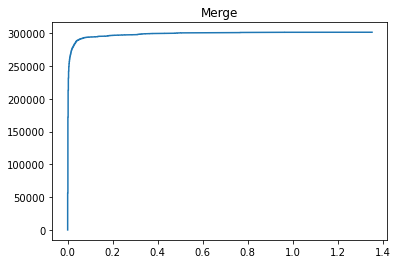

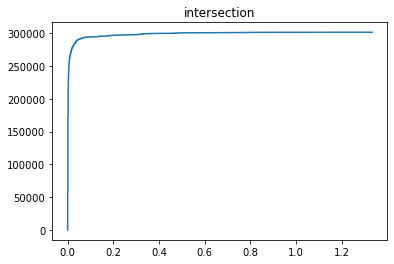

In [19]:
print("####### Accuracy Comparison ####### \n ")
cumulative_curve(accuracy, 'precision')
cumulative_curve(accuracy, 'recall')
cumulative_curve(accuracy, 'OPAL')
cumulative_curve(accuracy, 'Merge')
cumulative_curve(accuracy, 'intersection')

In [3]:
logs = pd.read_csv("/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd1000-14g/Logs.csv")

In [4]:
len(logs[logs['opalLog'].str.contains("Writing graph to")])

258

In [15]:
len(logs[(~logs['opalLog'].str.contains("OPALException")) & (~logs['opalLog'].str.contains("Writing graph to"))])

90

In [17]:
logs[(~logs['opalLog'].str.contains("OPALException")) & (~logs['opalLog'].str.contains("Writing graph to"))]['number']

0        0
11      11
24      24
40      40
41      41
      ... 
655    655
662    662
667    667
671    671
688    688
Name: number, Length: 90, dtype: int64

In [85]:
x = pd.read_csv("/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd1000-14g/Overall.csv")
xx = x[x['mergeTime'] != 0]

In [86]:
merge = xx['mergeTime']+xx['UCHTime']

In [141]:
sample_sizes=[10, 20, 30, 50, 100, 170, 300, 400, 500, 600]
result = {}
for size in sample_sizes:
    iteration = 200
    result[size] = []
    for i in range(iteration):
        sample = merge.sample(n=size)
        mean = int(sample.mean())
        result[size].append(mean)

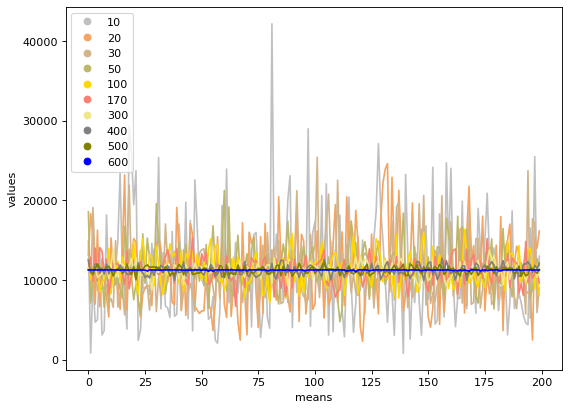

In [142]:
color_map = {10: 'silver', 20: 'sandybrown', 30: 'tan', 
              50: 'darkkhaki', 100: 'gold', 170: 'salmon', 
             300: 'khaki', 400: 'grey', 500: 'olive', 600: 'b'}

plt.figure(figsize=(8, 6), dpi=80)
# axis labeling
plt.xlabel('means')
plt.ylabel('values')

# figure name
plt.title('')

for size in sample_sizes:

    plt.plot(result[size], color_map[size])


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
plt.legend(markers, color_map.keys(), numpoints=1)



In [143]:
stds = []
for key in sample_sizes:
    stds.append(np.std(result[key]))

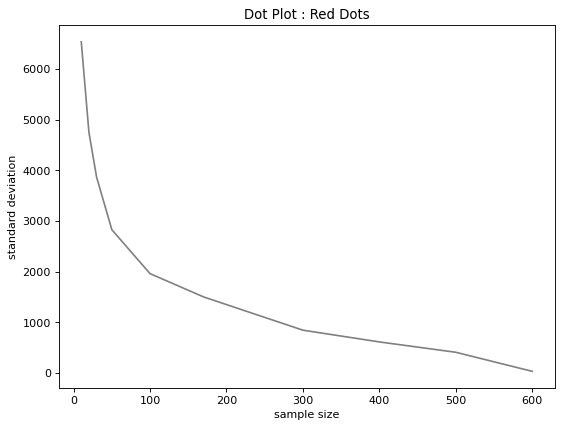

In [144]:
plt.figure(figsize=(8, 6), dpi=80)
# axis labeling
plt.xlabel('sample size')
plt.ylabel('standard deviation')

# figure name
plt.title('Dot Plot : Red Dots')

plt.plot(sample_sizes,stds, 'grey')

In [92]:
opal = xx[(xx['opalTime'] != 0) & (~xx['opalTime'].isna())]
opal.shape

(258, 12)

In [93]:
merged = opal['mergeTime']+opal['UCHTime']
merged.shape

(258,)

In [94]:
merged

4         26.0
5       4157.0
8        581.0
9       1334.0
12       214.0
        ...   
636     1502.0
637    28918.0
641      109.0
643     1680.0
644      542.0
Length: 258, dtype: float64

In [95]:
diff = opal['opalTime']-merged
diff

4        381.0
5       5699.0
8       3632.0
9       6920.0
12      2080.0
        ...   
636     7026.0
637   -14411.0
641      733.0
643     7350.0
644     2695.0
Length: 258, dtype: float64

In [96]:
sample_sizes= list(range(2, 258))
means = {}
stds = []
for size in sample_sizes:
    mean = int(diff.sample(n=size).mean())
    stds.append(int(diff.sample(n=size).std()))
    means[size] = mean

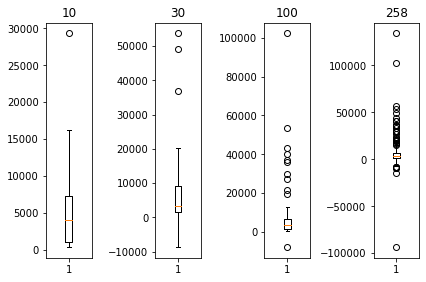

In [97]:
fig, (ax1) = plt.subplots(nrows=1, ncols=4, sharey=False)
ax1[0].boxplot(diff.sample(n=10))
ax1[0].set_title('10')
ax1[1].boxplot(diff.sample(n=30))
ax1[1].set_title('30')
ax1[2].boxplot(diff.sample(n=100))
ax1[2].set_title('100')
ax1[3].boxplot(diff.sample(n=258))
ax1[3].set_title('258')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

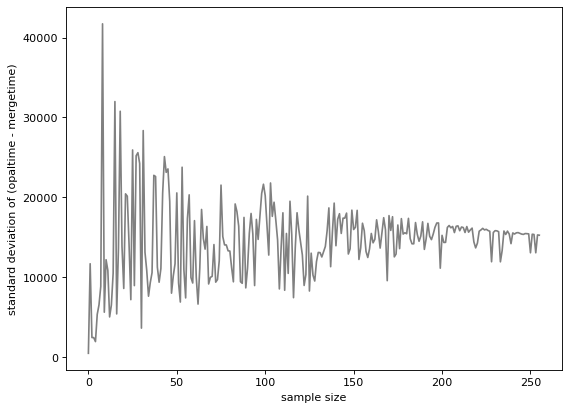

In [72]:
plt.figure(figsize=(8, 6), dpi=80)
# axis labeling
plt.xlabel('sample size')
plt.ylabel('standard deviation of (opaltime - mergetime)')

# figure name
plt.title('')

plt.plot(stds, 'grey')

(array([238.,  12.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([8.000000e+00, 2.113290e+04, 4.225780e+04, 6.338270e+04,
        8.450760e+04, 1.056325e+05, 1.267574e+05, 1.478823e+05,
        1.690072e+05, 1.901321e+05, 2.112570e+05]),
 <a list of 10 Patch objects>)

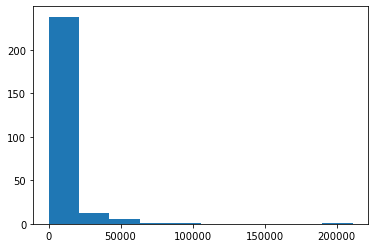

In [48]:
plt.hist(merged)

(array([  1.,   0.,   0.,  10., 225.,  16.,   4.,   0.,   1.,   1.]),
 array([-93641. , -70902.6, -48164.2, -25425.8,  -2687.4,  20051. ,
         42789.4,  65527.8,  88266.2, 111004.6, 133743. ]),
 <a list of 10 Patch objects>)

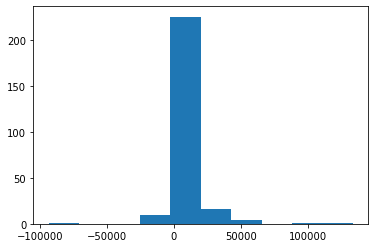

In [57]:
plt.hist(diff)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff19a257a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff19a266100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff19a2576a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff19a2667c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff19a266ac0>],
 'means': []}

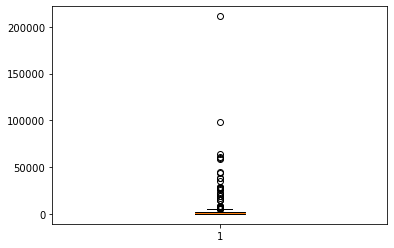

In [49]:
plt.boxplot(merged)

In [50]:
merged.describe()

count       258.000000
mean       5435.961240
std       17531.938468
min           8.000000
25%         215.000000
50%         742.000000
75%        2191.250000
max      211257.000000
dtype: float64

In [51]:
opal["opalTime"].describe()

count       258.000000
mean      11720.317829
std       22328.573913
min         233.000000
25%        1648.750000
50%        4405.000000
75%       10581.000000
max      172094.000000
Name: opalTime, dtype: float64

In [52]:
opal["mergedAll"] = merged

<ipython-input-52-a19e9aac07dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opal["mergedAll"] = merged


In [53]:
opal = opal.drop(columns=["totalMergeTime","cgPool","mergeTime","UCHTime","opalNodes","opalEdges","mergeNodes","mergeEdges","dependencies","number","coordinate"])

In [54]:
opal.describe()

,opalTime,mergedAll
count,258.000000,258.000000
mean,11720.317829,5435.961240
std,22328.573913,17531.938468
min,233.000000,8.000000
25%,1648.750000,215.000000
50%,4405.000000,742.000000
75%,10581.000000,2191.250000
max,172094.000000,211257.000000
